In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
import string
%matplotlib inline 

In [2]:
documento = "'Sachin is considered to be one of the greatest cricket players','Federer is considered to be one of the greatest tennis players','Pele is considered to be one of the greatest football players','Jordan is considered to be one of the greatest basketball players"

In [3]:
stopwordsnltk = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [4]:
def remove(texto):
    text = " ".join([p for p in texto if p not in string.punctuation])
    tokens = re.split('\W+',texto)
    texto = [ps.stem(palavra) for palavra in tokens if palavra not in stopwordsnltk]
    return texto

In [5]:
documento_2 = remove(documento)

In [6]:
print(documento_2)

['', 'sachin', 'consid', 'one', 'greatest', 'cricket', 'player', 'feder', 'consid', 'one', 'greatest', 'tenni', 'player', 'pele', 'consid', 'one', 'greatest', 'footbal', 'player', 'jordan', 'consid', 'one', 'greatest', 'basketbal', 'player']


In [7]:
vect = CountVectorizer()
vect.fit(documento_2)
vect.get_feature_names()  #unique words from text

['basketbal',
 'consid',
 'cricket',
 'feder',
 'footbal',
 'greatest',
 'jordan',
 'one',
 'pele',
 'player',
 'sachin',
 'tenni']

## Bag of Words 

In [8]:
documento_transformed = vect.transform(documento_2)
print(vect.get_feature_names())
documento_transformed.toarray()

['basketbal', 'consid', 'cricket', 'feder', 'footbal', 'greatest', 'jordan', 'one', 'pele', 'player', 'sachin', 'tenni']


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0,

In [9]:
data = pd.DataFrame(documento_transformed.toarray())
data.columns = vect.get_feature_names()
data.head()

,basketbal,consid,cricket,feder,footbal,greatest,jordan,one,pele,player,sachin,tenni
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
tfvect = TfidfVectorizer()
trans = tfvect.fit_transform(documento_2)
dados = pd.DataFrame(trans.toarray(), columns = tfvect.get_feature_names())

In [11]:
dados

,basketbal,consid,cricket,feder,footbal,greatest,jordan,one,pele,player,sachin,tenni
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [92]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   basketbal  12 non-null     float64
 1   consid     12 non-null     float64
 2   cricket    12 non-null     float64
 3   feder      12 non-null     float64
 4   footbal    12 non-null     float64
 5   greatest   12 non-null     float64
 6   jordan     12 non-null     float64
 7   one        12 non-null     float64
 8   pele       12 non-null     float64
 9   player     12 non-null     float64
 10  sachin     12 non-null     float64
 11  tenni      12 non-null     float64
dtypes: float64(12)
memory usage: 1.2 KB


In [93]:
import seaborn as sns

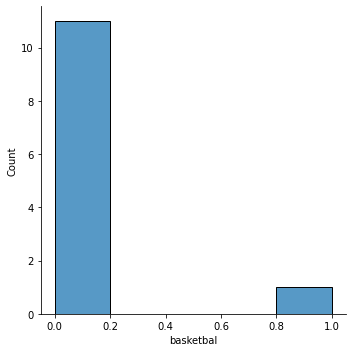

In [95]:
sns.displot(dados['basketbal'])

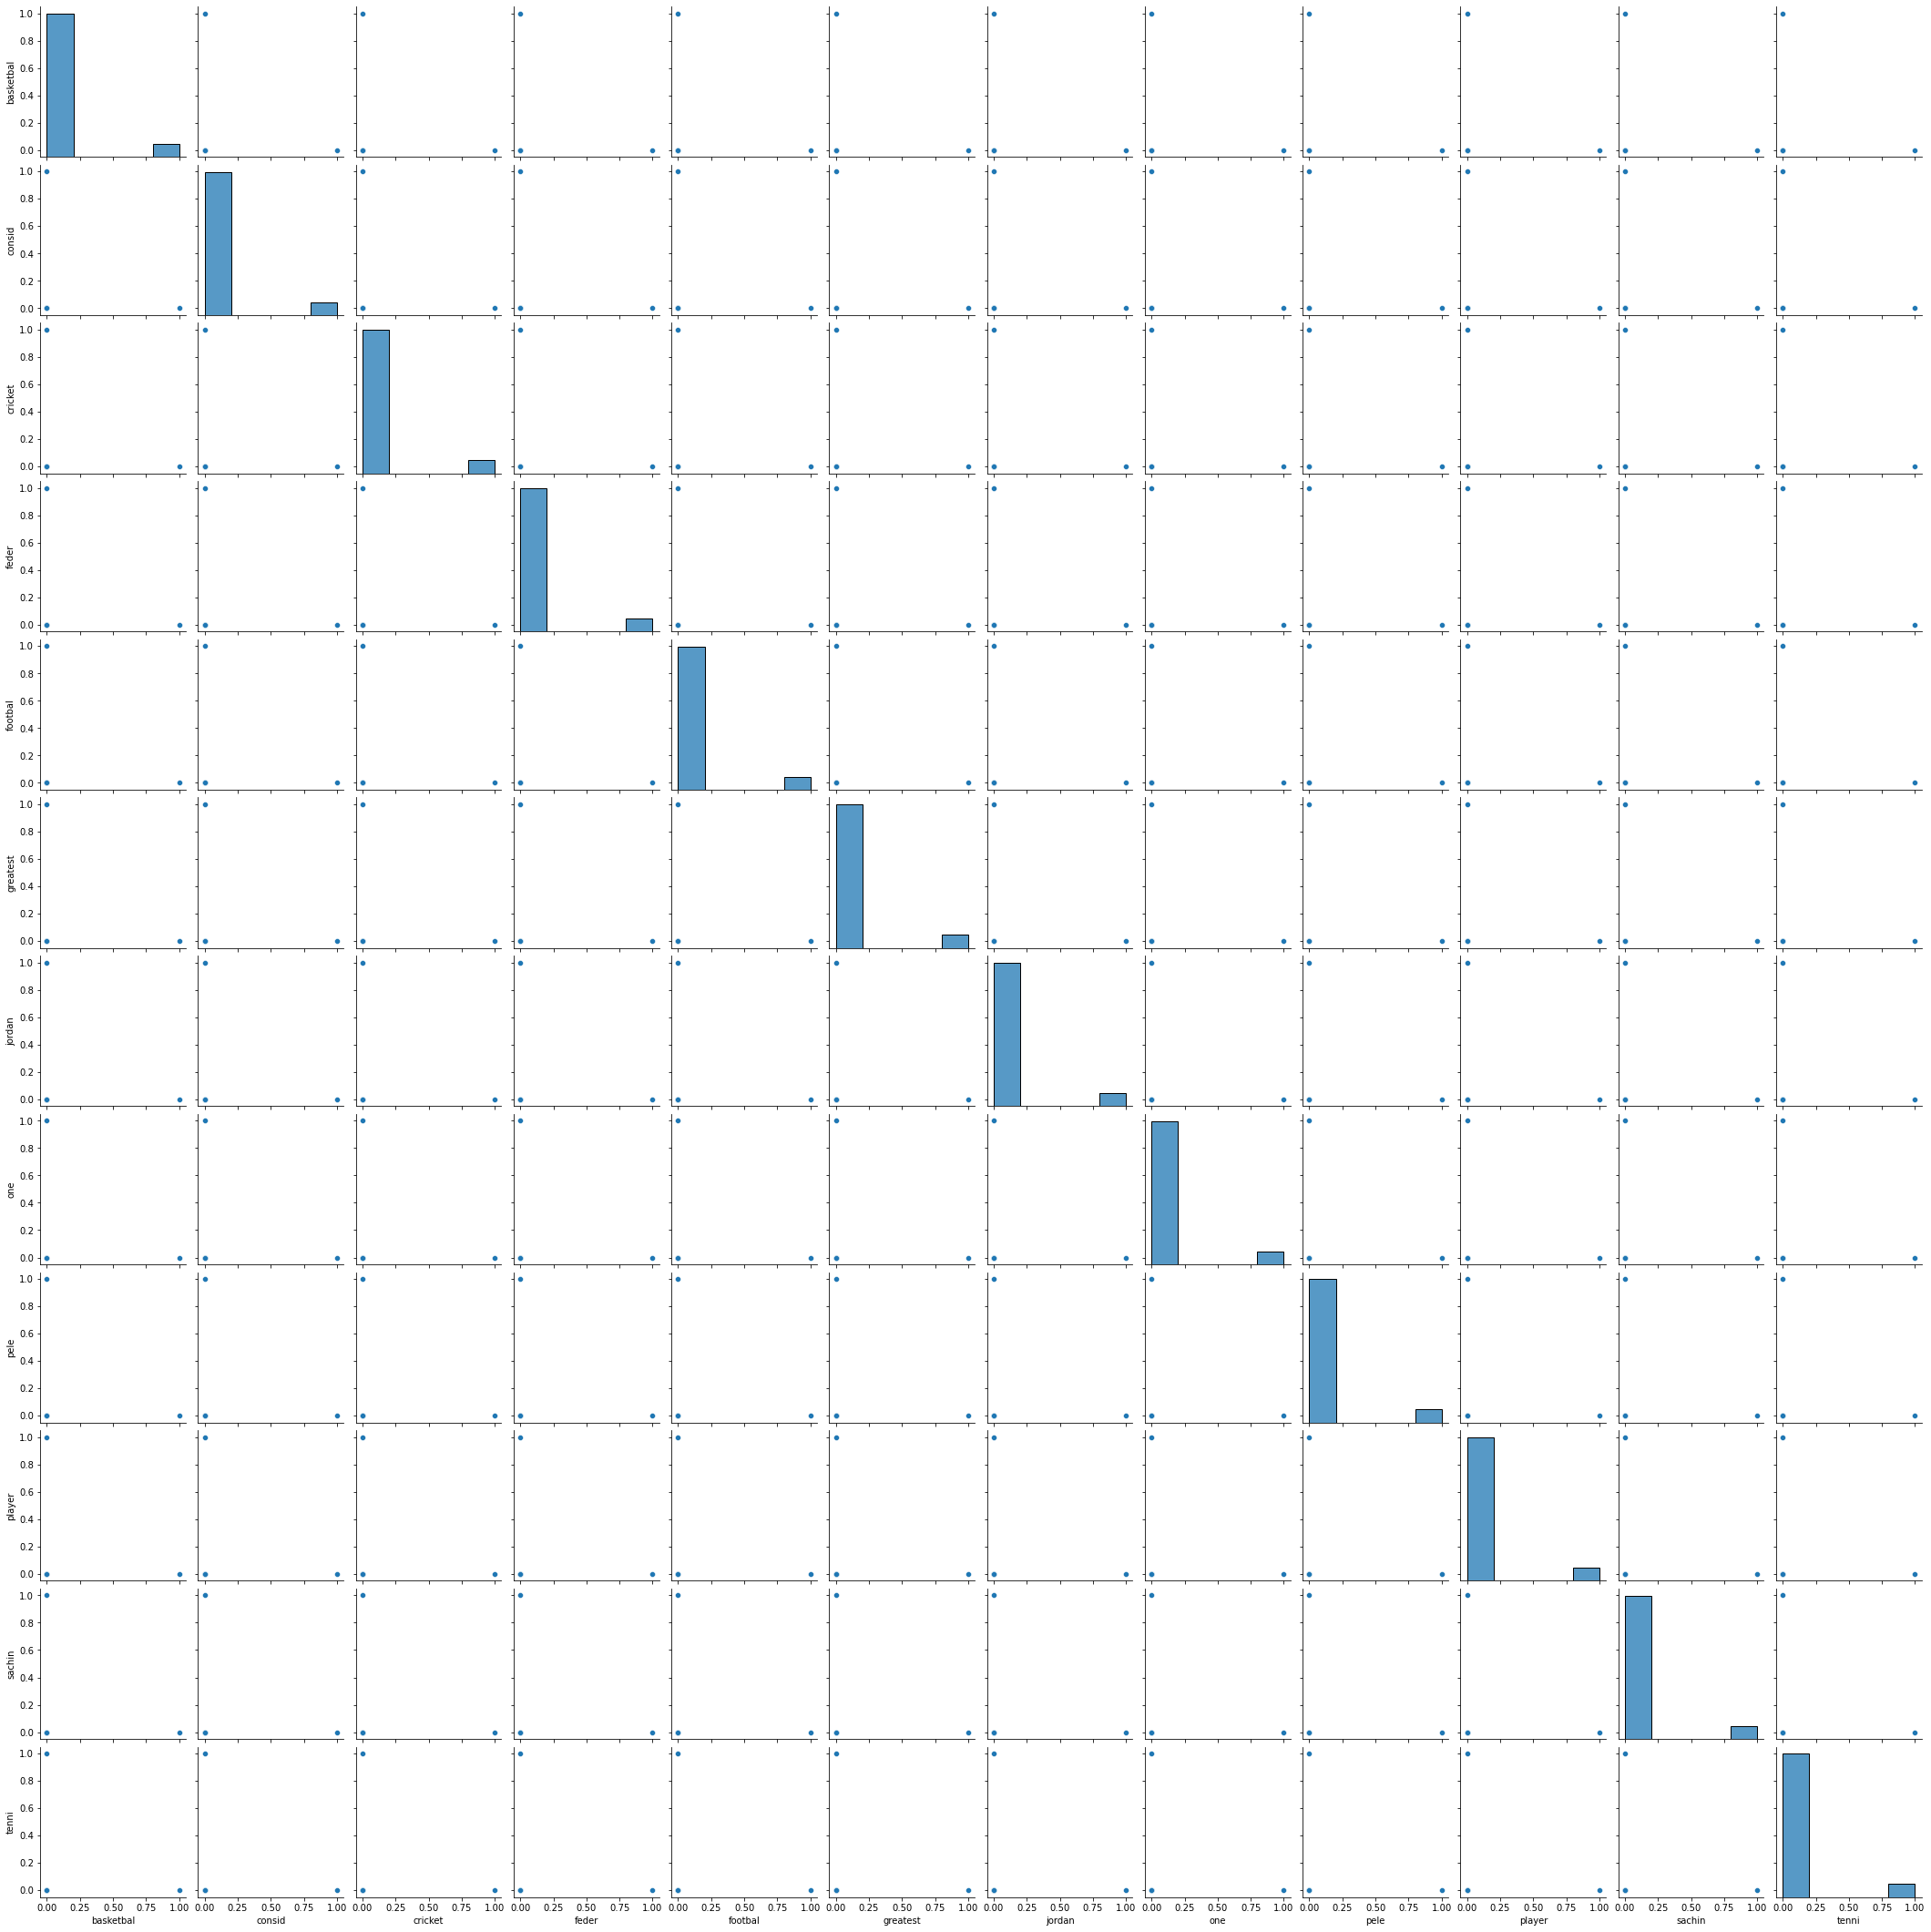

In [96]:
sns.pairplot(dados)